<h1>Table of Contents &lt;br&gt;&lt;/br&gt;<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Data-loading" data-toc-modified-id="Imports-and-Data-loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Data loading</a></span></li></ul></div>

## Imports and Data loading

In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
import json
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

import gym

from evsim.rl import DDQN
from evsim.simulation import Simulation, SimulationConfig
from evsim.controller import Controller, strategy

logger = logging.getLogger(__name__)

Using TensorFlow backend.


In [3]:
def visualize_log(filename, figsize=None, output=None):
    with open(filename, 'r') as f:
        data = json.load(f)
    if 'episode' not in data:
        raise ValueError('Log file "{}" does not contain the "episode" key.'.format(filename))
    episodes = data['episode']

    # Get value keys. The x axis is shared and is the number of episodes.
    keys = sorted(list(set(data.keys()).difference(set(['episode']))))

    if figsize is None:
        figsize = (15., 5. * len(keys))
    f, axarr = plt.subplots(len(keys), sharex=True, figsize=figsize)
    for idx, key in enumerate(keys):
        axarr[idx].plot(episodes, data[key])
        axarr[idx].set_ylabel(key)
    plt.xlabel('episodes')
    plt.tight_layout()
    if output is None:
        plt.show()
    else:
        plt.savefig(output)

        
def setup_logger(name, write=True):
    f = logging.Formatter("%(levelname)-7s %(message)s")

    sh = logging.StreamHandler()
    sh.setFormatter(f)
    sh.setLevel(logging.ERROR)
    handlers = [sh]

    if write:
        os.makedirs("./logs", exist_ok=True)
        fh = logging.FileHandler("./logs/%s.log" % name, mode="w")
        fh.setFormatter(f)
        fh.setLevel(logging.DEBUG)
        handlers = [sh, fh]

    logging.basicConfig(
        level=logging.DEBUG, datefmt="%d.%m. %H:%M:%S", handlers=handlers
    )

In [11]:
episode_steps = 6429

setup_logger("FleetSim-RL", write=False)
env = gym.make("evsim-v0") 

dqqn = DDQN(env, memory_limit=50000, nb_eps=50000, nb_warmup=1000, double=True, dueling=False)
dqqn.run(10 * episode_steps)

Training for 64290 steps ...


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


   696/64290: episode: 1, duration: 17.835s, episode steps: 696, steps per second: 39, episode reward: 1259.780, mean reward: 1.810 [-194.040, 45.980], mean action: 59.313 [0.000, 120.000], mean observation: 11.198 [0.000, 23.000], loss: --, mean_absolute_error: --, mean_q: --, mean_eps: --


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


  1372/64290: episode: 2, duration: 19.308s, episode steps: 676, steps per second: 35, episode reward: 1203.150, mean reward: 1.780 [-193.800, 125.430], mean action: 59.408 [0.000, 120.000], mean observation: 11.433 [0.000, 23.000], loss: 28.565305, mean_absolute_error: 5.603379, mean_q: 9.837730, mean_eps: 0.978652
  1388/64290: episode: 3, duration: 0.741s, episode steps: 16, steps per second: 22, episode reward: 58.100, mean reward: 3.631 [1.800, 5.820], mean action: 58.000 [13.000, 110.000], mean observation: 1.750 [0.000, 4.000], loss: 15.826092, mean_absolute_error: 11.616292, mean_q: 22.505574, mean_eps: 0.975169
  1865/64290: episode: 4, duration: 12.692s, episode steps: 477, steps per second: 38, episode reward: 853.420, mean reward: 1.789 [-15.910, 124.470], mean action: 61.155 [0.000, 120.000], mean observation: 11.476 [0.000, 23.000], loss: 46.099531, mean_absolute_error: 22.962924, mean_q: 31.352637, mean_eps: 0.970732
  2024/64290: episode: 5, duration: 4.441s, episode st

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


  3178/64290: episode: 7, duration: 20.528s, episode steps: 767, steps per second: 37, episode reward: 1416.400, mean reward: 1.847 [-192.890, 139.620], mean action: 58.915 [0.000, 120.000], mean observation: 11.515 [0.000, 23.000], loss: 60.331046, mean_absolute_error: 77.200164, mean_q: 91.898930, mean_eps: 0.949708
  3684/64290: episode: 8, duration: 13.111s, episode steps: 506, steps per second: 39, episode reward: 987.580, mean reward: 1.952 [-5.690, 56.010], mean action: 58.498 [0.000, 120.000], mean observation: 11.063 [0.000, 23.000], loss: 99.367790, mean_absolute_error: 109.526555, mean_q: 127.187603, mean_eps: 0.938251
  3731/64290: episode: 9, duration: 1.578s, episode steps: 47, steps per second: 30, episode reward: 126.380, mean reward: 2.689 [0.150, 5.280], mean action: 53.596 [0.000, 107.000], mean observation: 5.617 [0.000, 11.000], loss: 109.201634, mean_absolute_error: 120.397433, mean_q: 140.445280, mean_eps: 0.933274


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


  4427/64290: episode: 10, duration: 18.264s, episode steps: 696, steps per second: 38, episode reward: 1200.800, mean reward: 1.725 [-194.450, 41.430], mean action: 59.128 [0.000, 120.000], mean observation: 11.198 [0.000, 23.000], loss: 133.200666, mean_absolute_error: 141.480391, mean_q: 160.955931, mean_eps: 0.926587


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


  5297/64290: episode: 11, duration: 25.710s, episode steps: 870, steps per second: 34, episode reward: 1462.970, mean reward: 1.682 [-194.200, 17.920], mean action: 59.994 [0.000, 120.000], mean observation: 11.424 [0.000, 23.000], loss: 162.155147, mean_absolute_error: 179.043943, mean_q: 198.345144, mean_eps: 0.912493
  5877/64290: episode: 12, duration: 14.971s, episode steps: 580, steps per second: 39, episode reward: 1158.300, mean reward: 1.997 [0.000, 56.880], mean action: 59.881 [0.000, 120.000], mean observation: 11.422 [0.000, 23.000], loss: 176.120016, mean_absolute_error: 212.040510, mean_q: 233.735087, mean_eps: 0.899443
  6375/64290: episode: 13, duration: 12.762s, episode steps: 498, steps per second: 39, episode reward: 939.240, mean reward: 1.886 [0.000, 10.030], mean action: 58.655 [0.000, 120.000], mean observation: 11.157 [0.000, 23.000], loss: 205.384614, mean_absolute_error: 231.768303, mean_q: 252.949844, mean_eps: 0.889741
  6385/64290: episode: 14, duration: 0

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


  9506/64290: episode: 25, duration: 17.204s, episode steps: 680, steps per second: 40, episode reward: 1284.320, mean reward: 1.889 [-194.110, 91.900], mean action: 55.584 [0.000, 120.000], mean observation: 11.374 [0.000, 23.000], loss: 298.777068, mean_absolute_error: 312.079638, mean_q: 331.294533, mean_eps: 0.835021


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 10251/64290: episode: 26, duration: 19.193s, episode steps: 745, steps per second: 39, episode reward: 1356.890, mean reward: 1.821 [-193.110, 104.760], mean action: 55.713 [0.000, 120.000], mean observation: 11.243 [0.000, 23.000], loss: 277.170318, mean_absolute_error: 324.418940, mean_q: 344.062770, mean_eps: 0.822196
 10271/64290: episode: 27, duration: 0.938s, episode steps: 20, steps per second: 21, episode reward: 85.290, mean reward: 4.264 [0.000, 7.990], mean action: 42.850 [0.000, 91.000], mean observation: 2.250 [0.000, 5.000], loss: 486.353868, mean_absolute_error: 328.600398, mean_q: 346.944548, mean_eps: 0.815311
 10351/64290: episode: 28, duration: 2.414s, episode steps: 80, steps per second: 33, episode reward: 191.960, mean reward: 2.399 [0.000, 7.520], mean action: 55.250 [1.000, 119.000], mean observation: 9.750 [0.000, 20.000], loss: 399.729763, mean_absolute_error: 334.836615, mean_q: 354.033535, mean_eps: 0.814411
 10761/64290: episode: 29, duration: 11.548s, epi

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 12869/64290: episode: 34, duration: 18.287s, episode steps: 709, steps per second: 39, episode reward: 1376.510, mean reward: 1.941 [-194.890, 149.300], mean action: 57.530 [0.000, 120.000], mean observation: 11.128 [0.000, 23.000], loss: 210.348440, mean_absolute_error: 339.821390, mean_q: 354.448281, mean_eps: 0.774748
 12880/64290: episode: 35, duration: 0.637s, episode steps: 11, steps per second: 17, episode reward: 46.680, mean reward: 4.244 [1.640, 8.620], mean action: 55.818 [0.000, 100.000], mean observation: 1.091 [0.000, 2.000], loss: 41.833520, mean_absolute_error: 349.277896, mean_q: 368.161524, mean_eps: 0.768268
 13350/64290: episode: 36, duration: 11.883s, episode steps: 470, steps per second: 40, episode reward: 794.300, mean reward: 1.690 [-61.420, 55.230], mean action: 57.666 [0.000, 120.000], mean observation: 11.317 [0.000, 23.000], loss: 248.045661, mean_absolute_error: 342.354533, mean_q: 357.461772, mean_eps: 0.763939
 13366/64290: episode: 37, duration: 0.733s

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 17399/64290: episode: 48, duration: 18.301s, episode steps: 704, steps per second: 38, episode reward: 1373.250, mean reward: 1.951 [-194.570, 48.630], mean action: 47.354 [0.000, 120.000], mean observation: 11.148 [0.000, 23.000], loss: 239.536896, mean_absolute_error: 348.016273, mean_q: 365.333725, mean_eps: 0.693163
 17904/64290: episode: 49, duration: 12.878s, episode steps: 505, steps per second: 39, episode reward: 1054.990, mean reward: 2.089 [0.000, 76.560], mean action: 51.810 [0.000, 120.000], mean observation: 11.073 [0.000, 23.000], loss: 194.199814, mean_absolute_error: 348.390312, mean_q: 363.255780, mean_eps: 0.682282


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 18577/64290: episode: 50, duration: 17.522s, episode steps: 673, steps per second: 38, episode reward: 1316.250, mean reward: 1.956 [-194.810, 119.670], mean action: 53.542 [0.000, 120.000], mean observation: 11.483 [0.000, 23.000], loss: 214.008657, mean_absolute_error: 346.984152, mean_q: 362.152518, mean_eps: 0.671680


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 19256/64290: episode: 51, duration: 18.364s, episode steps: 679, steps per second: 37, episode reward: 1167.240, mean reward: 1.719 [-193.250, 16.260], mean action: 54.280 [0.000, 120.000], mean observation: 11.387 [0.000, 23.000], loss: 200.054955, mean_absolute_error: 343.817001, mean_q: 359.264615, mean_eps: 0.659512
 19653/64290: episode: 52, duration: 10.252s, episode steps: 397, steps per second: 39, episode reward: 705.730, mean reward: 1.778 [0.000, 11.400], mean action: 52.496 [0.000, 119.000], mean observation: 11.169 [0.000, 23.000], loss: 187.901025, mean_absolute_error: 343.709667, mean_q: 360.184004, mean_eps: 0.649828
 20043/64290: episode: 53, duration: 11.069s, episode steps: 390, steps per second: 35, episode reward: 694.950, mean reward: 1.782 [-10.700, 32.740], mean action: 50.992 [0.000, 120.000], mean observation: 11.331 [0.000, 23.000], loss: 192.721136, mean_absolute_error: 343.633121, mean_q: 357.975109, mean_eps: 0.642745
 20612/64290: episode: 54, duration: 

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 25751/64290: episode: 71, duration: 19.760s, episode steps: 727, steps per second: 37, episode reward: 1361.190, mean reward: 1.872 [-193.770, 43.000], mean action: 48.298 [0.000, 120.000], mean observation: 11.131 [0.000, 23.000], loss: 195.332288, mean_absolute_error: 327.764716, mean_q: 341.830661, mean_eps: 0.543034
 26153/64290: episode: 72, duration: 10.027s, episode steps: 402, steps per second: 40, episode reward: 906.990, mean reward: 2.256 [0.000, 143.110], mean action: 45.157 [0.000, 120.000], mean observation: 11.075 [0.000, 23.000], loss: 176.160028, mean_absolute_error: 325.317444, mean_q: 339.587283, mean_eps: 0.532873
 26265/64290: episode: 73, duration: 3.127s, episode steps: 112, steps per second: 36, episode reward: 282.150, mean reward: 2.519 [-1.710, 9.770], mean action: 54.143 [0.000, 119.000], mean observation: 10.107 [0.000, 23.000], loss: 228.026775, mean_absolute_error: 321.664323, mean_q: 333.294576, mean_eps: 0.528247


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 26953/64290: episode: 74, duration: 17.284s, episode steps: 688, steps per second: 40, episode reward: 1496.330, mean reward: 2.175 [-193.490, 144.600], mean action: 48.209 [0.000, 120.000], mean observation: 11.273 [0.000, 23.000], loss: 180.317870, mean_absolute_error: 321.214560, mean_q: 335.459248, mean_eps: 0.521047
 27392/64290: episode: 75, duration: 10.993s, episode steps: 439, steps per second: 40, episode reward: 918.490, mean reward: 2.092 [-7.200, 116.310], mean action: 50.613 [0.000, 120.000], mean observation: 10.888 [0.000, 23.000], loss: 164.998181, mean_absolute_error: 319.390779, mean_q: 333.763850, mean_eps: 0.510904


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 28079/64290: episode: 76, duration: 17.915s, episode steps: 687, steps per second: 38, episode reward: 1344.690, mean reward: 1.957 [-192.880, 9.800], mean action: 51.253 [0.000, 120.000], mean observation: 11.284 [0.000, 23.000], loss: 157.426005, mean_absolute_error: 317.123831, mean_q: 329.945637, mean_eps: 0.500770


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 28766/64290: episode: 77, duration: 18.076s, episode steps: 687, steps per second: 38, episode reward: 1189.910, mean reward: 1.732 [-192.790, 18.350], mean action: 54.211 [0.000, 120.000], mean observation: 11.284 [0.000, 23.000], loss: 169.904303, mean_absolute_error: 315.320720, mean_q: 328.136105, mean_eps: 0.488404
 28806/64290: episode: 78, duration: 1.316s, episode steps: 40, steps per second: 30, episode reward: 155.920, mean reward: 3.898 [0.450, 8.920], mean action: 41.550 [11.000, 118.000], mean observation: 4.750 [0.000, 10.000], loss: 300.460118, mean_absolute_error: 314.046676, mean_q: 327.061327, mean_eps: 0.481861


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 29550/64290: episode: 79, duration: 18.686s, episode steps: 744, steps per second: 40, episode reward: 1273.580, mean reward: 1.712 [-204.300, 123.470], mean action: 46.038 [0.000, 120.000], mean observation: 11.234 [0.000, 23.000], loss: 171.146507, mean_absolute_error: 314.946034, mean_q: 329.771416, mean_eps: 0.474805
 30044/64290: episode: 80, duration: 12.330s, episode steps: 494, steps per second: 40, episode reward: 1222.440, mean reward: 2.475 [0.000, 172.610], mean action: 43.466 [0.000, 120.000], mean observation: 11.217 [0.000, 23.000], loss: 159.258891, mean_absolute_error: 319.130240, mean_q: 334.020929, mean_eps: 0.463663
 30625/64290: episode: 81, duration: 14.529s, episode steps: 581, steps per second: 40, episode reward: 1260.180, mean reward: 2.169 [0.000, 42.920], mean action: 50.663 [0.000, 120.000], mean observation: 11.404 [0.000, 23.000], loss: 159.818905, mean_absolute_error: 318.087105, mean_q: 330.602102, mean_eps: 0.453988


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 31318/64290: episode: 82, duration: 17.390s, episode steps: 693, steps per second: 40, episode reward: 1370.400, mean reward: 1.977 [-193.160, 88.530], mean action: 47.648 [0.000, 120.000], mean observation: 11.224 [0.000, 23.000], loss: 168.466159, mean_absolute_error: 319.906815, mean_q: 334.485692, mean_eps: 0.442522


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 32005/64290: episode: 83, duration: 17.038s, episode steps: 687, steps per second: 40, episode reward: 1349.770, mean reward: 1.965 [-193.040, 142.650], mean action: 48.396 [0.000, 120.000], mean observation: 11.284 [0.000, 23.000], loss: 148.480077, mean_absolute_error: 317.783940, mean_q: 330.274958, mean_eps: 0.430102


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 32767/64290: episode: 84, duration: 21.209s, episode steps: 762, steps per second: 36, episode reward: 1445.070, mean reward: 1.896 [-192.310, 60.010], mean action: 45.795 [0.000, 120.000], mean observation: 11.441 [0.000, 23.000], loss: 183.948188, mean_absolute_error: 315.522435, mean_q: 328.520250, mean_eps: 0.417061
 33152/64290: episode: 85, duration: 12.199s, episode steps: 385, steps per second: 32, episode reward: 782.390, mean reward: 2.032 [0.000, 90.820], mean action: 43.595 [0.000, 120.000], mean observation: 11.470 [0.000, 23.000], loss: 136.812117, mean_absolute_error: 317.028538, mean_q: 329.306340, mean_eps: 0.406738
 33664/64290: episode: 86, duration: 14.078s, episode steps: 512, steps per second: 36, episode reward: 1113.800, mean reward: 2.175 [0.000, 42.230], mean action: 46.000 [1.000, 120.000], mean observation: 11.016 [0.000, 23.000], loss: 181.590247, mean_absolute_error: 316.655408, mean_q: 328.677972, mean_eps: 0.398665
 34239/64290: episode: 87, duration: 1

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 39761/64290: episode: 99, duration: 19.257s, episode steps: 767, steps per second: 40, episode reward: 1637.010, mean reward: 2.134 [-193.550, 110.700], mean action: 42.701 [0.000, 120.000], mean observation: 11.515 [0.000, 23.000], loss: 164.171559, mean_absolute_error: 313.941594, mean_q: 326.027916, mean_eps: 0.291214
 39828/64290: episode: 100, duration: 1.967s, episode steps: 67, steps per second: 34, episode reward: 181.820, mean reward: 2.714 [-3.440, 5.010], mean action: 54.104 [8.000, 118.000], mean observation: 8.119 [0.000, 16.000], loss: 176.437814, mean_absolute_error: 312.739549, mean_q: 327.957482, mean_eps: 0.283708
 39921/64290: episode: 101, duration: 2.684s, episode steps: 93, steps per second: 35, episode reward: 311.060, mean reward: 3.345 [0.240, 6.500], mean action: 33.667 [0.000, 118.000], mean observation: 11.376 [0.000, 23.000], loss: 146.840886, mean_absolute_error: 313.447301, mean_q: 325.153153, mean_eps: 0.282268


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 40607/64290: episode: 102, duration: 17.172s, episode steps: 686, steps per second: 40, episode reward: 1501.580, mean reward: 2.189 [-192.840, 148.290], mean action: 45.983 [0.000, 120.000], mean observation: 11.296 [0.000, 23.000], loss: 149.915453, mean_absolute_error: 313.862294, mean_q: 326.825204, mean_eps: 0.275257
 41194/64290: episode: 103, duration: 14.612s, episode steps: 587, steps per second: 40, episode reward: 1460.730, mean reward: 2.488 [-5.070, 40.780], mean action: 39.750 [0.000, 120.000], mean observation: 11.305 [0.000, 23.000], loss: 140.870999, mean_absolute_error: 316.041993, mean_q: 329.553881, mean_eps: 0.263800
 41738/64290: episode: 104, duration: 14.948s, episode steps: 544, steps per second: 36, episode reward: 1304.470, mean reward: 2.398 [-13.200, 155.880], mean action: 44.796 [0.000, 120.000], mean observation: 11.059 [0.000, 23.000], loss: 161.463563, mean_absolute_error: 320.648895, mean_q: 334.028044, mean_eps: 0.253621


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 42437/64290: episode: 105, duration: 17.953s, episode steps: 699, steps per second: 39, episode reward: 1619.340, mean reward: 2.317 [-192.960, 141.210], mean action: 40.309 [0.000, 120.000], mean observation: 11.176 [0.000, 23.000], loss: 138.757498, mean_absolute_error: 319.489685, mean_q: 332.691451, mean_eps: 0.242434


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 43223/64290: episode: 106, duration: 20.665s, episode steps: 786, steps per second: 38, episode reward: 1639.760, mean reward: 2.086 [-194.280, 149.210], mean action: 43.422 [0.000, 120.000], mean observation: 11.282 [0.000, 23.000], loss: 140.223923, mean_absolute_error: 320.972832, mean_q: 334.028014, mean_eps: 0.229069
 43764/64290: episode: 107, duration: 13.714s, episode steps: 541, steps per second: 39, episode reward: 1287.380, mean reward: 2.380 [-3.090, 34.310], mean action: 40.717 [0.000, 120.000], mean observation: 11.035 [0.000, 23.000], loss: 171.445402, mean_absolute_error: 318.621517, mean_q: 331.068834, mean_eps: 0.217126


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 44437/64290: episode: 108, duration: 17.170s, episode steps: 673, steps per second: 39, episode reward: 1301.610, mean reward: 1.934 [-193.540, 123.760], mean action: 42.915 [0.000, 119.000], mean observation: 11.483 [0.000, 23.000], loss: 146.471201, mean_absolute_error: 318.794083, mean_q: 330.928724, mean_eps: 0.206200
 44491/64290: episode: 109, duration: 1.849s, episode steps: 54, steps per second: 29, episode reward: 141.020, mean reward: 2.611 [0.170, 4.860], mean action: 41.815 [18.000, 112.000], mean observation: 6.500 [0.000, 13.000], loss: 178.755582, mean_absolute_error: 318.223897, mean_q: 328.781290, mean_eps: 0.199657
 44896/64290: episode: 110, duration: 10.260s, episode steps: 405, steps per second: 39, episode reward: 956.660, mean reward: 2.362 [0.000, 132.820], mean action: 42.437 [1.000, 119.000], mean observation: 11.027 [0.000, 23.000], loss: 178.124871, mean_absolute_error: 318.067221, mean_q: 330.268665, mean_eps: 0.195526
 45477/64290: episode: 111, duration:

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 46136/64290: episode: 112, duration: 18.387s, episode steps: 659, steps per second: 36, episode reward: 1438.040, mean reward: 2.182 [-193.520, 151.700], mean action: 47.199 [0.000, 120.000], mean observation: 11.326 [0.000, 23.000], loss: 132.492355, mean_absolute_error: 316.037129, mean_q: 327.839245, mean_eps: 0.175492


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 46811/64290: episode: 113, duration: 20.190s, episode steps: 675, steps per second: 33, episode reward: 1504.080, mean reward: 2.228 [-192.640, 181.080], mean action: 38.945 [0.000, 116.000], mean observation: 11.449 [0.000, 23.000], loss: 178.171748, mean_absolute_error: 315.157749, mean_q: 328.251942, mean_eps: 0.163486
 47204/64290: episode: 114, duration: 13.299s, episode steps: 393, steps per second: 30, episode reward: 804.180, mean reward: 2.046 [0.000, 109.850], mean action: 48.720 [1.000, 119.000], mean observation: 11.257 [0.000, 23.000], loss: 114.207761, mean_absolute_error: 316.253033, mean_q: 327.210567, mean_eps: 0.153874


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 47910/64290: episode: 115, duration: 21.156s, episode steps: 706, steps per second: 33, episode reward: 1558.600, mean reward: 2.208 [-194.200, 207.200], mean action: 40.846 [0.000, 120.000], mean observation: 11.139 [0.000, 23.000], loss: 165.493793, mean_absolute_error: 315.948460, mean_q: 328.455520, mean_eps: 0.143983
 48454/64290: episode: 116, duration: 17.463s, episode steps: 544, steps per second: 31, episode reward: 1187.820, mean reward: 2.183 [-7.260, 107.450], mean action: 49.208 [0.000, 118.000], mean observation: 11.059 [0.000, 23.000], loss: 139.058671, mean_absolute_error: 315.290329, mean_q: 328.237841, mean_eps: 0.132733
 48841/64290: episode: 117, duration: 10.421s, episode steps: 387, steps per second: 37, episode reward: 907.420, mean reward: 2.345 [0.000, 192.860], mean action: 45.367 [0.000, 118.000], mean observation: 11.411 [0.000, 23.000], loss: 142.233081, mean_absolute_error: 314.082194, mean_q: 326.004984, mean_eps: 0.124354


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 49527/64290: episode: 118, duration: 17.635s, episode steps: 686, steps per second: 39, episode reward: 1600.090, mean reward: 2.332 [-192.690, 191.060], mean action: 42.633 [0.000, 119.000], mean observation: 11.296 [0.000, 23.000], loss: 166.866936, mean_absolute_error: 312.519181, mean_q: 324.059087, mean_eps: 0.114697
 49719/64290: episode: 119, duration: 5.395s, episode steps: 192, steps per second: 36, episode reward: 460.410, mean reward: 2.398 [-7.820, 7.810], mean action: 37.188 [2.000, 114.000], mean observation: 11.500 [0.000, 23.000], loss: 115.052802, mean_absolute_error: 311.785206, mean_q: 323.778494, mean_eps: 0.106795


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 50455/64290: episode: 120, duration: 18.823s, episode steps: 736, steps per second: 39, episode reward: 1653.120, mean reward: 2.246 [-194.650, 180.510], mean action: 37.708 [1.000, 120.000], mean observation: 11.174 [0.000, 23.000], loss: 164.659037, mean_absolute_error: 313.677853, mean_q: 326.871888, mean_eps: 0.100969
 50996/64290: episode: 121, duration: 15.438s, episode steps: 541, steps per second: 35, episode reward: 1202.070, mean reward: 2.222 [-10.040, 18.060], mean action: 41.327 [0.000, 117.000], mean observation: 11.035 [0.000, 23.000], loss: 123.089816, mean_absolute_error: 314.713188, mean_q: 326.877132, mean_eps: 0.100000
 51002/64290: episode: 122, duration: 0.555s, episode steps: 6, steps per second: 11, episode reward: 27.190, mean reward: 4.532 [2.020, 7.950], mean action: 45.500 [22.000, 81.000], mean observation: 0.500 [0.000, 1.000], loss: 518.899861, mean_absolute_error: 316.964890, mean_q: 328.955093, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 51745/64290: episode: 123, duration: 22.865s, episode steps: 743, steps per second: 32, episode reward: 1506.760, mean reward: 2.028 [-195.010, 46.250], mean action: 37.735 [1.000, 119.000], mean observation: 11.225 [0.000, 23.000], loss: 162.780352, mean_absolute_error: 315.132153, mean_q: 327.246950, mean_eps: 0.100000
 52225/64290: episode: 124, duration: 16.224s, episode steps: 480, steps per second: 30, episode reward: 1248.400, mean reward: 2.601 [0.000, 143.200], mean action: 37.017 [1.000, 117.000], mean observation: 11.500 [0.000, 23.000], loss: 149.390079, mean_absolute_error: 315.861490, mean_q: 328.201436, mean_eps: 0.100000
 52632/64290: episode: 125, duration: 13.479s, episode steps: 407, steps per second: 30, episode reward: 996.440, mean reward: 2.448 [-10.470, 184.710], mean action: 45.914 [0.000, 119.000], mean observation: 10.998 [0.000, 23.000], loss: 142.836655, mean_absolute_error: 316.077805, mean_q: 327.901571, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 53305/64290: episode: 126, duration: 21.414s, episode steps: 673, steps per second: 31, episode reward: 1372.640, mean reward: 2.040 [-194.000, 154.660], mean action: 41.409 [0.000, 120.000], mean observation: 11.483 [0.000, 23.000], loss: 166.696275, mean_absolute_error: 315.603543, mean_q: 327.545297, mean_eps: 0.100000
 53691/64290: episode: 127, duration: 11.239s, episode steps: 386, steps per second: 34, episode reward: 932.060, mean reward: 2.415 [0.000, 169.040], mean action: 43.008 [0.000, 119.000], mean observation: 11.440 [0.000, 23.000], loss: 128.037712, mean_absolute_error: 314.785259, mean_q: 327.661889, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 54443/64290: episode: 128, duration: 22.718s, episode steps: 752, steps per second: 33, episode reward: 1646.950, mean reward: 2.190 [-193.680, 80.930], mean action: 37.242 [0.000, 120.000], mean observation: 11.314 [0.000, 23.000], loss: 172.497450, mean_absolute_error: 314.951239, mean_q: 327.397560, mean_eps: 0.100000
 54832/64290: episode: 129, duration: 11.011s, episode steps: 389, steps per second: 35, episode reward: 1013.060, mean reward: 2.604 [0.000, 137.990], mean action: 31.329 [2.000, 118.000], mean observation: 11.357 [0.000, 23.000], loss: 171.288991, mean_absolute_error: 315.450004, mean_q: 328.838923, mean_eps: 0.100000
 54900/64290: episode: 130, duration: 2.232s, episode steps: 68, steps per second: 30, episode reward: 200.010, mean reward: 2.941 [0.160, 6.920], mean action: 34.618 [0.000, 107.000], mean observation: 8.250 [0.000, 17.000], loss: 82.011497, mean_absolute_error: 314.676983, mean_q: 325.054745, mean_eps: 0.100000
 55000/64290: episode: 131, duration: 3

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 56070/64290: episode: 133, duration: 19.491s, episode steps: 685, steps per second: 35, episode reward: 1533.730, mean reward: 2.239 [-193.970, 119.440], mean action: 32.997 [0.000, 119.000], mean observation: 11.308 [0.000, 23.000], loss: 164.778666, mean_absolute_error: 314.707476, mean_q: 327.060355, mean_eps: 0.100000
 56117/64290: episode: 134, duration: 1.815s, episode steps: 47, steps per second: 26, episode reward: 142.160, mean reward: 3.025 [0.000, 7.030], mean action: 38.021 [7.000, 81.000], mean observation: 5.617 [0.000, 11.000], loss: 254.669579, mean_absolute_error: 312.516152, mean_q: 326.616090, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 56814/64290: episode: 135, duration: 19.633s, episode steps: 697, steps per second: 36, episode reward: 1644.200, mean reward: 2.359 [-193.640, 99.780], mean action: 36.813 [0.000, 117.000], mean observation: 11.191 [0.000, 23.000], loss: 147.569361, mean_absolute_error: 317.757353, mean_q: 330.651065, mean_eps: 0.100000
 56820/64290: episode: 136, duration: 0.533s, episode steps: 6, steps per second: 11, episode reward: 40.240, mean reward: 6.707 [4.290, 9.010], mean action: 5.333 [0.000, 32.000], mean observation: 0.500 [0.000, 1.000], loss: 328.696970, mean_absolute_error: 316.239563, mean_q: 328.476257, mean_eps: 0.100000
 56888/64290: episode: 137, duration: 2.211s, episode steps: 68, steps per second: 31, episode reward: 186.270, mean reward: 2.739 [0.130, 8.670], mean action: 41.397 [0.000, 106.000], mean observation: 8.250 [0.000, 17.000], loss: 195.808041, mean_absolute_error: 318.868862, mean_q: 329.492635, mean_eps: 0.100000
 57391/64290: episode: 138, duration: 14.143s, ep

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 59380/64290: episode: 143, duration: 20.935s, episode steps: 686, steps per second: 33, episode reward: 1421.670, mean reward: 2.072 [-193.160, 122.720], mean action: 43.741 [2.000, 119.000], mean observation: 11.296 [0.000, 23.000], loss: 136.781814, mean_absolute_error: 314.712982, mean_q: 326.536720, mean_eps: 0.100000
 59480/64290: episode: 144, duration: 3.474s, episode steps: 100, steps per second: 29, episode reward: 197.390, mean reward: 1.974 [0.000, 7.050], mean action: 60.420 [0.000, 109.000], mean observation: 11.050 [0.000, 23.000], loss: 147.584771, mean_absolute_error: 313.979369, mean_q: 324.627674, mean_eps: 0.100000
 59869/64290: episode: 145, duration: 11.542s, episode steps: 389, steps per second: 34, episode reward: 924.310, mean reward: 2.376 [0.000, 141.420], mean action: 37.177 [0.000, 120.000], mean observation: 11.357 [0.000, 23.000], loss: 179.333016, mean_absolute_error: 313.684562, mean_q: 325.201904, mean_eps: 0.100000
 60456/64290: episode: 146, duration

ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 61149/64290: episode: 147, duration: 18.835s, episode steps: 693, steps per second: 37, episode reward: 1545.680, mean reward: 2.230 [-193.990, 117.860], mean action: 42.817 [0.000, 118.000], mean observation: 11.224 [0.000, 23.000], loss: 160.786522, mean_absolute_error: 311.823162, mean_q: 323.413190, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 61809/64290: episode: 148, duration: 17.214s, episode steps: 660, steps per second: 38, episode reward: 1276.830, mean reward: 1.935 [-192.540, 9.760], mean action: 45.367 [0.000, 119.000], mean observation: 11.341 [0.000, 23.000], loss: 164.715428, mean_absolute_error: 309.166547, mean_q: 320.443727, mean_eps: 0.100000
 61829/64290: episode: 149, duration: 0.860s, episode steps: 20, steps per second: 23, episode reward: 117.940, mean reward: 5.897 [1.860, 7.750], mean action: 11.000 [11.000, 11.000], mean observation: 2.250 [0.000, 5.000], loss: 98.621979, mean_absolute_error: 310.722966, mean_q: 323.630820, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 62762/64290: episode: 150, duration: 24.517s, episode steps: 933, steps per second: 38, episode reward: 2163.920, mean reward: 2.319 [-193.970, 149.260], mean action: 41.072 [0.000, 118.000], mean observation: 11.269 [0.000, 23.000], loss: 137.814580, mean_absolute_error: 310.127593, mean_q: 321.872670, mean_eps: 0.100000


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


 63464/64290: episode: 151, duration: 18.676s, episode steps: 702, steps per second: 38, episode reward: 1559.610, mean reward: 2.222 [-193.250, 76.990], mean action: 38.154 [0.000, 120.000], mean observation: 11.158 [0.000, 23.000], loss: 147.564231, mean_absolute_error: 312.179106, mean_q: 324.820828, mean_eps: 0.100000
 63947/64290: episode: 152, duration: 12.403s, episode steps: 483, steps per second: 39, episode reward: 1148.710, mean reward: 2.378 [-7.790, 188.830], mean action: 43.828 [0.000, 118.000], mean observation: 11.429 [0.000, 23.000], loss: 147.263169, mean_absolute_error: 312.503890, mean_q: 324.756882, mean_eps: 0.100000
done, took 1752.734 seconds


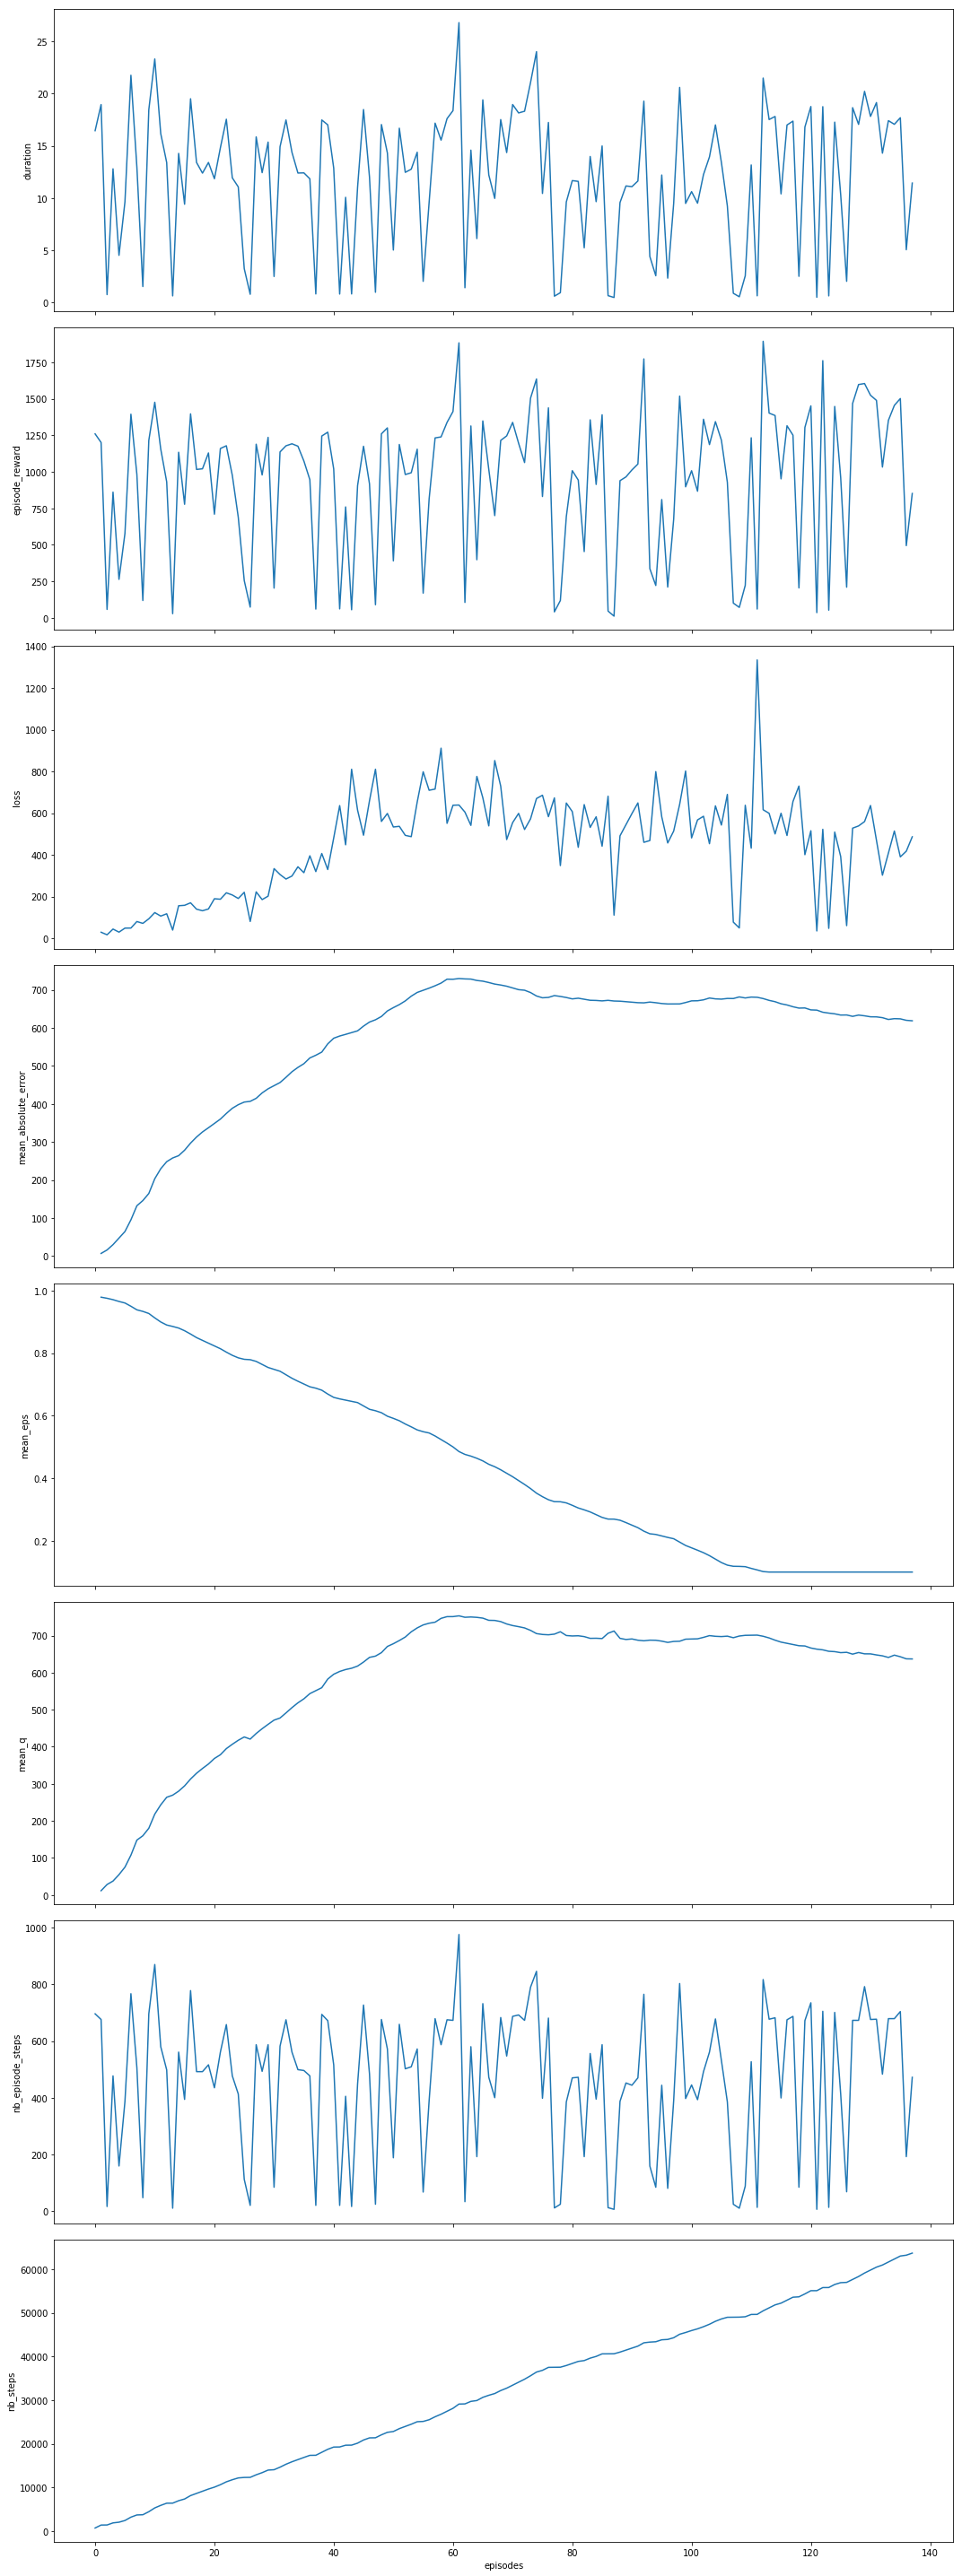

In [5]:
visualize_log(dqqn.log_filename)

In [12]:
result_filename = "./results/sim_result_ep_{}.csv"

def results(filename):
    start = "2016-06-01"
    end = "2018-01-01"

    df = pd.read_csv(filename)
    df = df.groupby(df.index // 3).agg({'timestamp': np.min,
                                        'risk_bal': np.min,
                                        'risk_intr': np.min,
                                        'profit_eur': np.sum,
                                        'imbalance_kwh': np.sum,
                                        'lost_rentals_eur': np.sum,
                                        'charged_vpp_kwh': np.sum,
                                        })

    df["timestamp"] = df["timestamp"].apply(lambda x : datetime.fromtimestamp(x))
    df = df.set_index("timestamp")
    df = df[start:end]
    
    print(df.describe())

    grouper = "week"
    df[grouper] = df.index.week
    
    # sns.lineplot(x="week", y="profit_eur", data=df);
    sns.lineplot(x=grouper, y="risk_bal", data=df, label="Balancing");
    sns.lineplot(x=grouper, y="risk_intr", data=df, label="Intraday");

    print("Profit {:d} EUR".format(int(df["profit_eur"].sum())))
    print("Imbalance {} kWh".format(df["imbalance_kwh"].sum()))
    print("Lost rentals {} EUR".format(df["lost_rentals_eur"].sum()))
    print("Mean Risk Balancing={:.3}, Intraday={:.3}".format(df["risk_bal"].mean(), df["risk_intr"].mean()))
    

         risk_bal   risk_intr  profit_eur  imbalance_kwh  lost_rentals_eur  \
count  483.000000  483.000000  483.000000     483.000000        483.000000   
mean     0.350104    0.531677    2.403126       0.001863          0.024845   
std      0.299472    0.265926    8.718516       0.040951          0.546019   
min      0.000000    0.000000    0.000000       0.000000          0.000000   
25%      0.100000    0.300000    0.815000       0.000000          0.000000   
50%      0.300000    0.600000    1.520000       0.000000          0.000000   
75%      0.600000    0.700000    2.660000       0.000000          0.000000   
max      1.000000    1.000000  188.830000       0.900000         12.000000   

       charged_vpp_kwh  
count       483.000000  
mean         11.949689  
std          19.533779  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%          20.250000  
max         115.200000  
Profit 1160 EUR
Imbalance 0.9 kWh
Lost rentals 12.0 EUR
Mean Risk Balanc

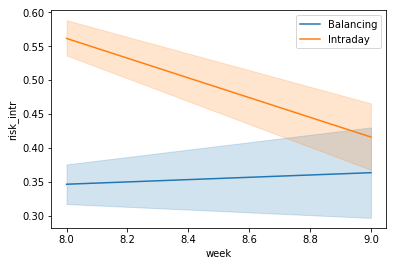

In [13]:
results(result_filename.format(env.episode-1))

In [8]:
dqqn.test()

Testing for 1 episodes ...


ERROR   [2017-03-01 06:00:00] - S-GO2586(19.75/100) Not enough battery for the planned trip 13113!


Episode 1: reward: 1587.940, steps: 683


         risk_bal   risk_intr  profit_eur  imbalance_kwh  lost_rentals_eur  \
count  683.000000  683.000000  683.000000     683.000000        683.000000   
mean     0.447877    0.285944    2.618360       0.006589          0.293411   
std      0.288348    0.046349    5.721887       0.172188          7.486410   
min      0.100000    0.100000    0.000000       0.000000          0.000000   
25%      0.100000    0.300000    0.980000       0.000000          0.000000   
50%      0.700000    0.300000    2.000000       0.000000          0.000000   
75%      0.700000    0.300000    3.395000       0.000000          0.000000   
max      0.700000    0.300000  143.080000       4.500000        195.600000   

       charged_vpp_kwh  
count       683.000000  
mean         24.981259  
std          26.171610  
min           0.000000  
25%           0.000000  
50%          21.600000  
75%          39.150000  
max         116.100000  
Profit 1788 EUR
Imbalance 4.5 kWh
Lost rentals 200.4 EUR
Mean Risk Balan

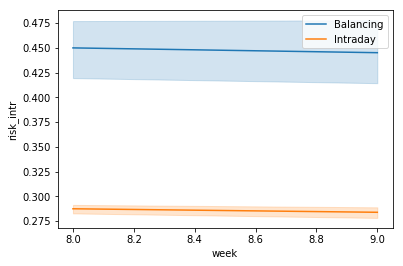

In [14]:
results(result_filename.format("test"))